# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)

In [18]:
# sample code for Problem 2

obj = lambda x: (x - 1)**2  # note that this is 1D. In Prob 2 it should be 2D.
grad = lambda x, y: 2*(x - 1)  # this is not the correct gradient!
eps = 1e-3  # termination criterion
x0 = 0.  # initial guess
k = 0  # counter
soln = [x0]  # use an array to store the search steps
x = soln[k]  # start with the initial guess
error = abs(grad(x, x2))  # compute the error. Note you will need to compute the norm for 2D grads, rather than the absolute value
# a = 0.01  # set a fixed step size to start with

# Armijo line search
def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) - a*0.8*grad(x)**2  # define phi as a search criterion
    while phi(a,x)<obj(x-a*grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5*a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    a = line_search(x)
    x = x - a*grad(x)
    soln.append(x)
    error = abs(grad(x))
    
soln  # print the search trajectory


[0.0,
 0.25,
 0.4375,
 0.578125,
 0.68359375,
 0.7626953125,
 0.822021484375,
 0.86651611328125,
 0.8998870849609375,
 0.9249153137207031,
 0.9436864852905273,
 0.9577648639678955,
 0.9683236479759216,
 0.9762427359819412,
 0.9821820519864559,
 0.9866365389898419,
 0.9899774042423815,
 0.9924830531817861,
 0.9943622898863396,
 0.9957717174147547,
 0.996828788061066,
 0.9976215910457995,
 0.9982161932843496,
 0.9986621449632622,
 0.9989966087224467,
 0.999247456541835,
 0.9994355924063762,
 0.9995766943047821]

In [13]:
import numpy
obj = lambda x: 5*x[0]**2 + 12*x[0]*x[1] - 8*x[0] + 10*x[1]**2 - 14*x[1] + 6

def grad(x) : # gradient found for 2 dimensional function
    return [10*x[0] + 12*x[1] - 8, 12*x[0] + 20*x[1] - 14]

eps = 1e-3

xin = 10   # different guesses were tested with low numbers displaying


n = 0

soln = [[xin, xin]]

x = [xin, xin]

error = numpy.linalg.norm(grad(x))

def line_search(x) :
    a = 1.
    phi = lambda a, x: [obj(x) - a*.8*grad(x)[0]**2, obj(x) - a*.8*grad(x)[1]**2]
  
    while phi(a,x)[0]<obj([x[0]-a*grad(x)[0],x[1]-a*grad(x)[1]]) and phi(a,x)[1]<obj([x[0]-a*grad(x)[0],x[1]-a*grad(x)[1]]):
  # outputted value only returning one unchanged number error in this while loop      
        a = .5*a
        
    return a
    
while error >= eps :
    
    a = line_search(x)
    x[0] = x[0] - a*grad(x)[0]
    x[1] = x[1] - a*grad(x)[1]
    soln.append(x)
    error = numpy.linalg.norm(grad(x))
 

    
soln

[[10, 10],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],
 [-0.14269210976135316, 0.7856215185424826],

Initial points tested were [1,1] , [3,3] , [5,5] , [10,10]. The corresponding solutions all contained the same error and only outputted one number all of the solutions remained in the range of 0 and 1 indicating there is a range to the potential solutions.

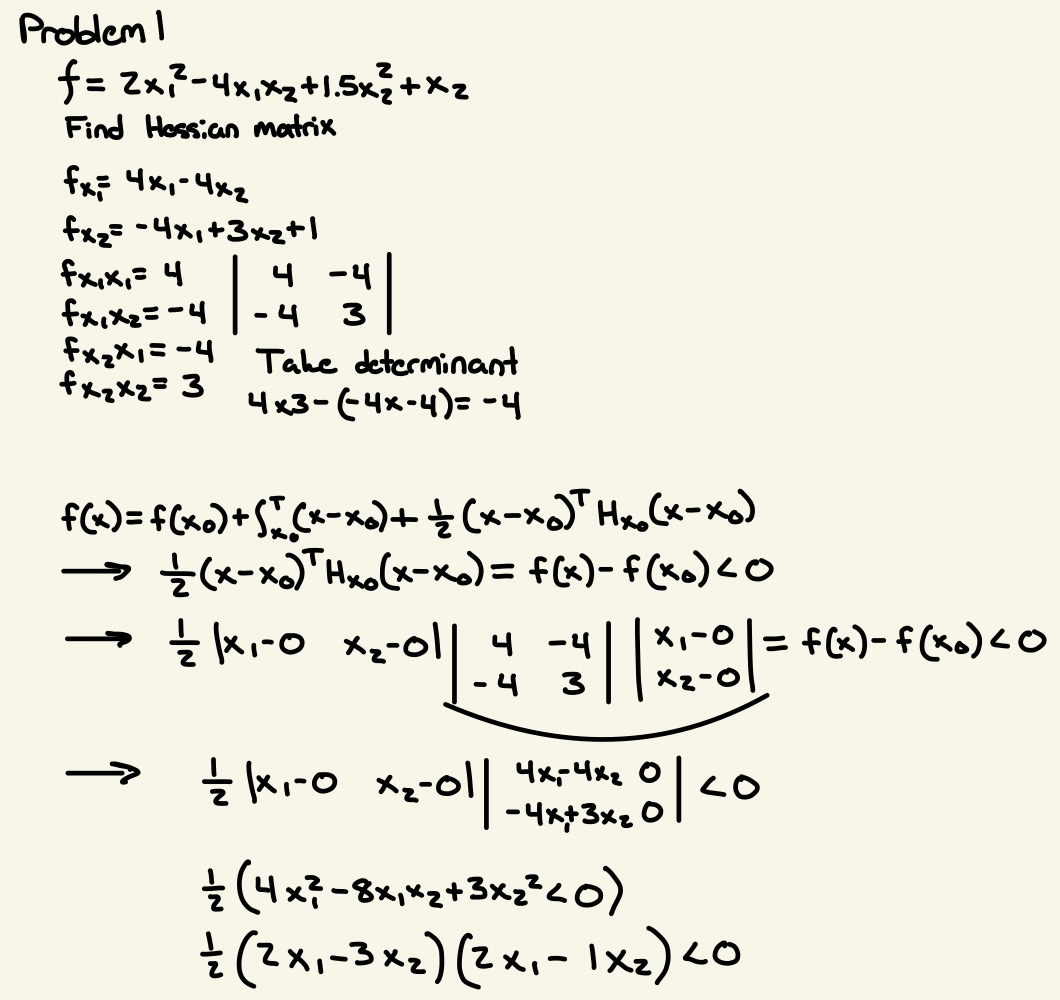

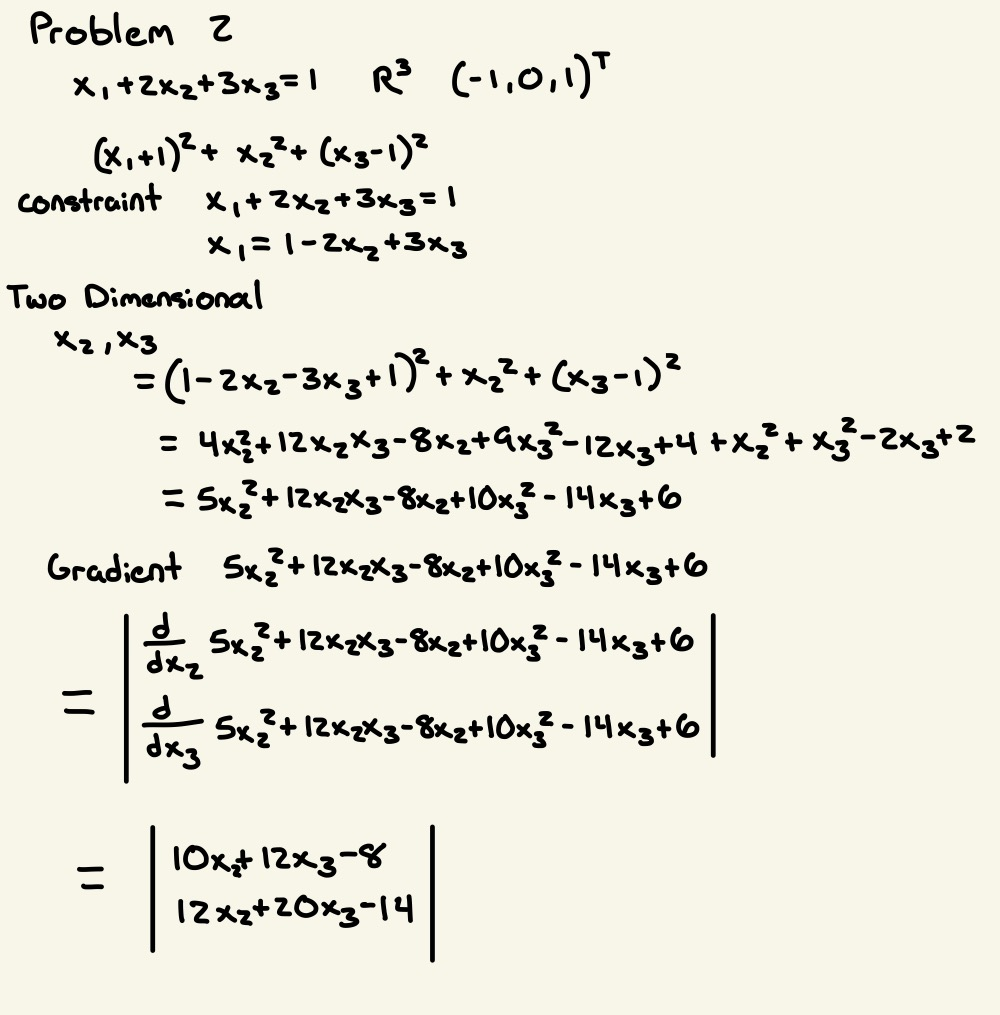

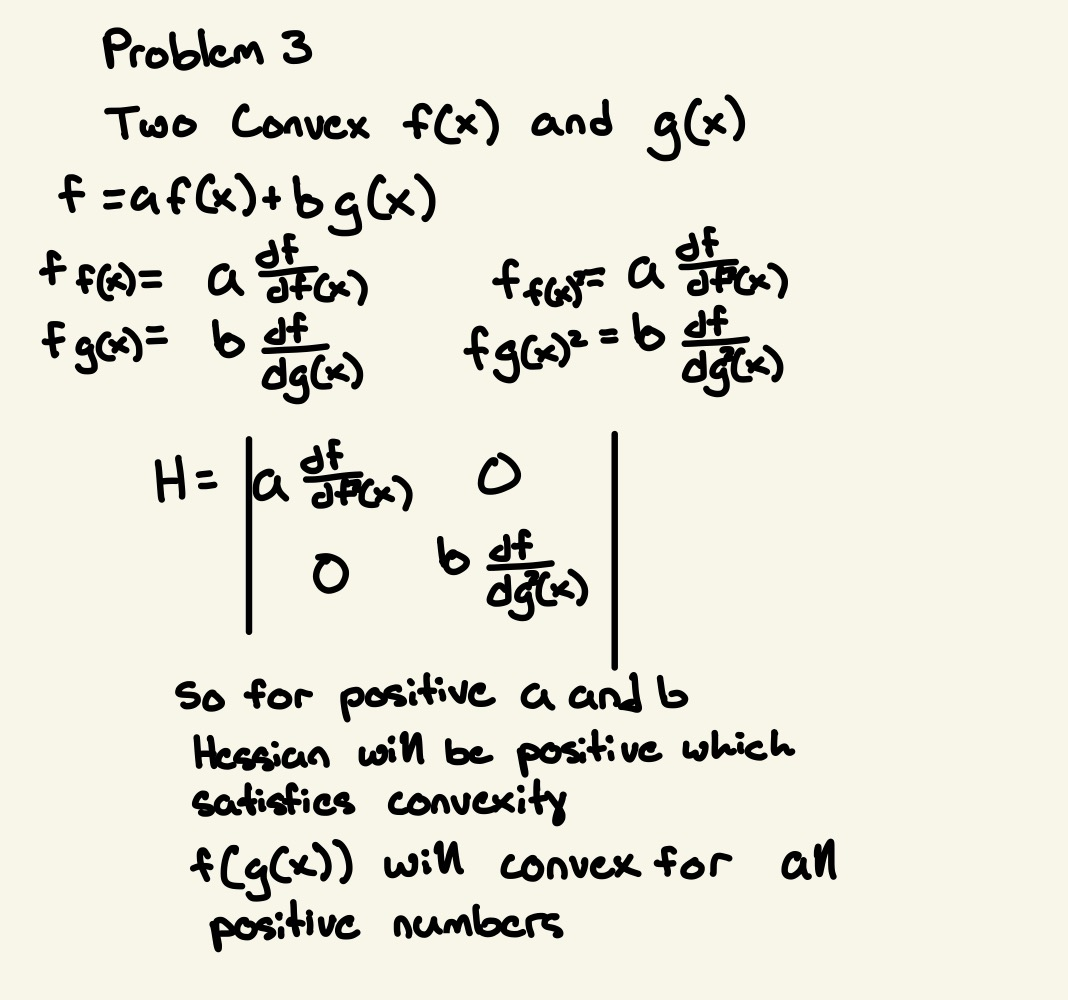

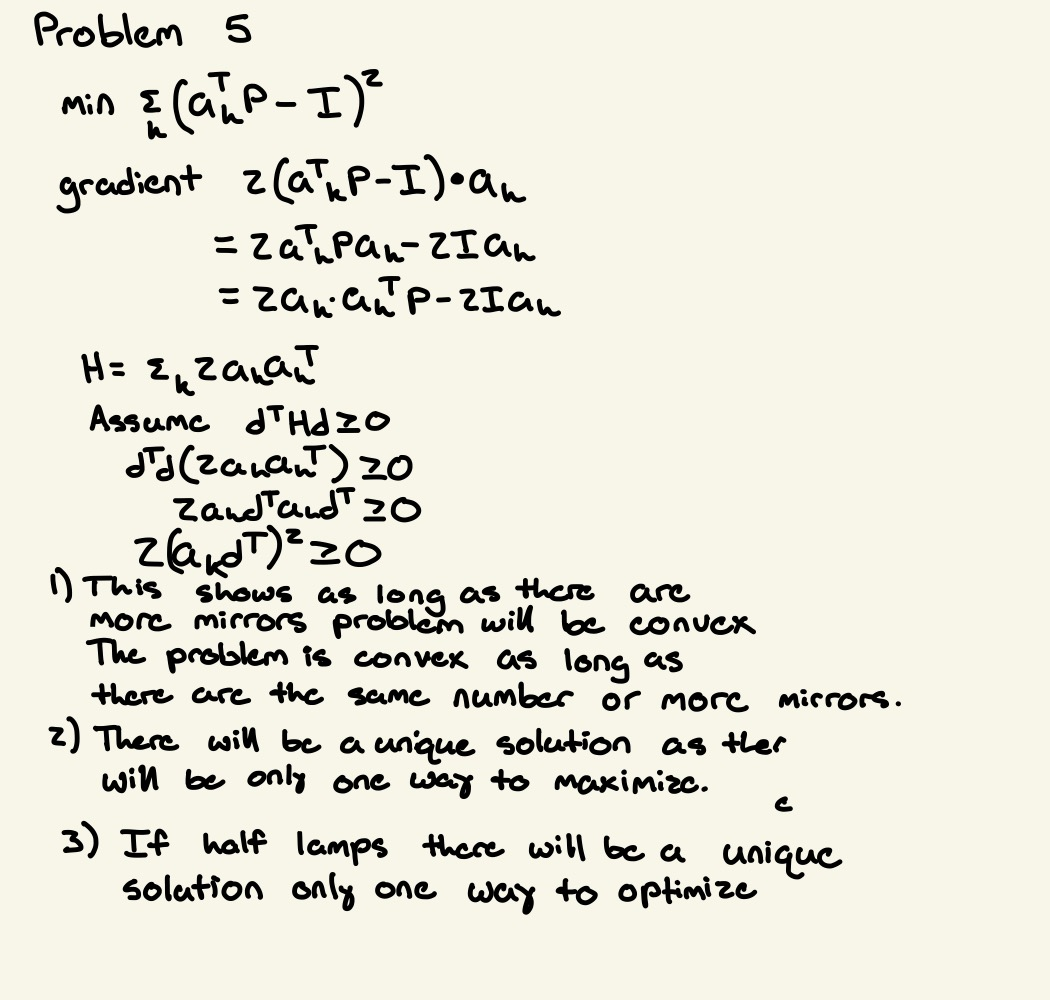